In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

sns.set(style="ticks")
#sns.set(style="whitegrid", color_codes=True)

data1 = pd.read_excel('CFST Database.xlsx', sheet_name='Sheet1')
data1.head()

,Authors,specimen,D(mm),t(mm),P,P0 (kN),Ast (mm2),Ac (mm2),a/D,P/P0,fc (MPa),fy (MPa),Vtest (kN)
0,Qian et al. (2007),A1-11,194.0,5.5,0.0,2086.227485,3255.40,26301.42,0.1,0.000,40.5,330.0,1002.0
1,Qian et al. (2007),B1-11,194.0,7.5,0.0,2821.648245,4392.08,25164.20,0.1,0.000,40.5,422.0,1204.0
2,Qian et al. (2007),A1-21,194.0,5.5,900.0,2086.227485,3255.40,26301.42,0.1,0.431,40.5,330.0,1295.0
3,Qian et al. (2007),B1-21,194.0,7.5,1307.0,2821.648245,4392.08,25164.20,0.1,0.463,40.5,422.0,1618.0
4,Qian et al. (2007),A1-31,194.0,5.5,1500.0,2086.227485,3255.40,26301.42,0.1,0.719,40.5,330.0,1604.0


In [2]:
data=data1.loc[:, 'Ast (mm2)':'Vtest (kN)']
data.head()

,Ast (mm2),Ac (mm2),a/D,P/P0,fc (MPa),fy (MPa),Vtest (kN)
0,3255.40,26301.42,0.1,0.000,40.5,330.0,1002.0
1,4392.08,25164.20,0.1,0.000,40.5,422.0,1204.0
2,3255.40,26301.42,0.1,0.431,40.5,330.0,1295.0
3,4392.08,25164.20,0.1,0.463,40.5,422.0,1618.0
4,3255.40,26301.42,0.1,0.719,40.5,330.0,1604.0


In [3]:
print(data.shape)

(230, 7)


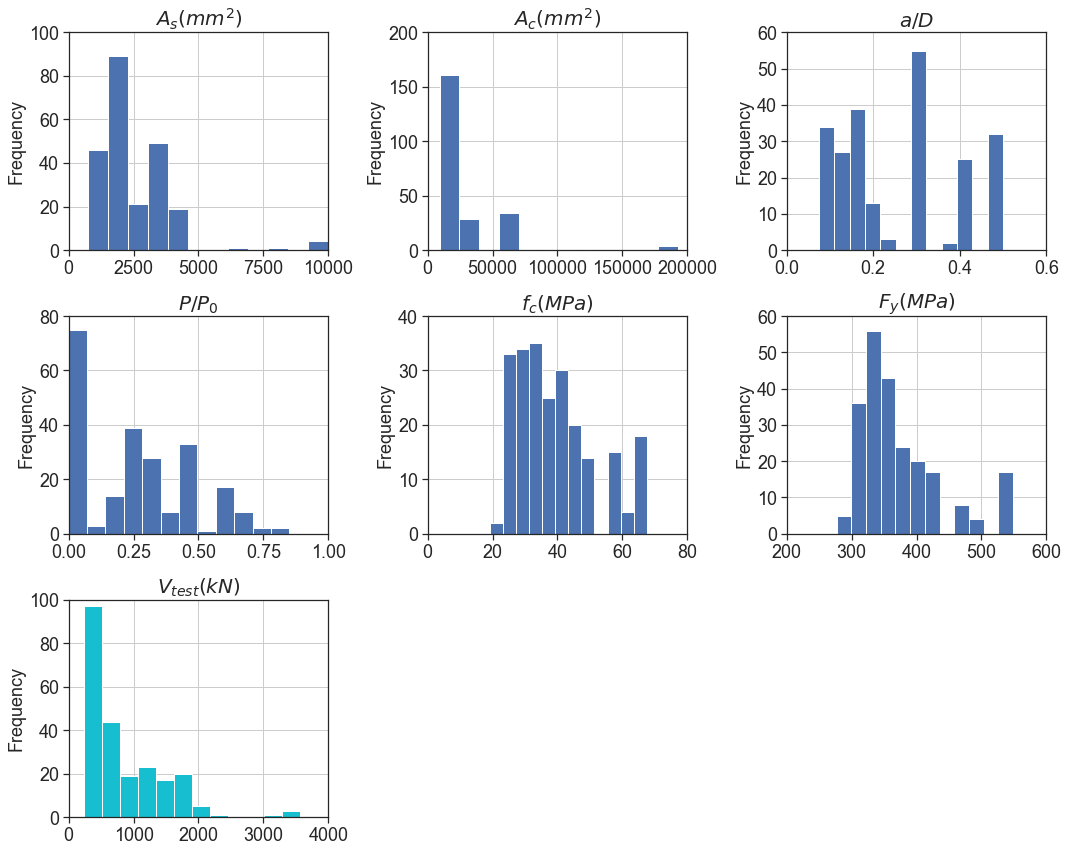

In [4]:
# Histogram 
#sns.set(style="ticks")
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
fig_h, axes_h = plt.subplots(3, 3,  figsize = (15, 12))
data['Ast (mm2)'].hist(ax=axes_h[0, 0], bins=12)
axes_h[0, 0].set_title('$A_{s} (mm^2)$', fontsize=20)
axes_h[0, 0].set_xlim(0, 10000)
axes_h[0, 0].set_ylim(0, 100)
data['Ac (mm2)'].hist(ax=axes_h[0, 1], bins=12)
axes_h[0, 1].set_title('$A_c (mm^2)$', fontsize=20)
axes_h[0, 1].set_xlim(0, 200000)
axes_h[0, 1].set_ylim(0, 200)
data['a/D'].hist(ax=axes_h[0, 2], bins=12)
axes_h[0, 2].set_title('$a/D$', fontsize=20)
axes_h[0, 2].set_xlim(0, 0.6)
axes_h[0, 2].set_ylim(0, 60)
data['P/P0'].hist(ax=axes_h[1, 0], bins=12)
axes_h[1, 0].set_title('$P/P_0$', fontsize=20)
axes_h[1, 0].set_xlim(0, 1)
axes_h[1, 0].set_ylim(0, 80)
data['fc (MPa)'].hist(ax=axes_h[1, 1], bins=12)
axes_h[1, 1].set_title('$f_c (MPa)$', fontsize=20)
axes_h[1, 1].set_xlim(0, 80)
axes_h[1, 1].set_ylim(0, 40)
data['fy (MPa)'].hist(ax=axes_h[1, 2], bins=12)
axes_h[1, 2].set_title('$F_y (MPa)$', fontsize=20)
axes_h[1, 2].set_xlim(200, 600)
axes_h[1, 2].set_ylim(0, 60)
data['Vtest (kN)'].hist(ax=axes_h[2, 0], bins=12, color='tab:cyan')
axes_h[2, 0].set_title('$V_{test} (kN)$', fontsize=20)
axes_h[2, 0].set_xlim(0, 4000)
axes_h[2, 0].set_ylim(0, 100)

for idx in range(0, 3):
    for idy in range (0, 3):
        axes_h[idx,idy].set_ylabel('Frequency', fontsize = 18)
        
axes_h[2, 1].set_visible(False)
axes_h[2, 2].set_visible(False)
fig_h.tight_layout()
plt.savefig('histogram of database.eps', format='eps')

In [5]:
data.describe()

,Ast (mm2),Ac (mm2),a/D,P/P0,fc (MPa),fy (MPa),Vtest (kN)
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,2433.859565,29263.512565,0.259152,0.255152,39.312670,373.090870,870.841522
std,1486.740543,29151.265799,0.136223,0.222867,12.116456,66.633621,602.415544
min,741.040000,9116.560000,0.075000,0.000000,19.200000,276.800000,240.000000
25%,1526.040000,17436.110000,0.140000,0.000000,29.500000,330.000000,435.625000
50%,2191.790000,19855.070000,0.250000,0.253000,35.990000,346.950000,627.500000
75%,3184.910000,25164.200000,0.386250,0.452750,46.000000,408.000000,1210.500000
max,10002.400000,192669.840000,0.500000,0.850000,67.500000,549.000000,3569.000000


In [6]:
# split into input (X) and output (Y) variables
X = data.drop(['Vtest (kN)'], axis =1)
Y = data['Vtest (kN)']

print(X.shape)
print(Y.shape)

(230, 6)
(230,)


In [7]:
# randomly spliting the database into training-testing sets as 70%-30% 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# normalizing the data sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Different machine learning (ML) models are adopted below to predict the shear strength of concrete-filled steel tubes (CFSTs). The performances of these ML models are evaluated and compared with each other.

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

Linear_regressor = LinearRegression()

# training the model
Linear_regressor.fit(X_train, y_train)

# predicting the results
Y_train_Linear = Linear_regressor.predict(X_train)
Y_test_Linear = Linear_regressor.predict(X_test)


print("Training R2:", r2_score(y_train, Y_train_Linear), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_Linear)),
      "MAE:", mean_absolute_error(y_train, Y_train_Linear))
print("Testing R2:", r2_score(y_test, Y_test_Linear), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_Linear)),
      "MAE:", mean_absolute_error(y_test, Y_test_Linear))

Training R2: 0.924405835584507 RMSE: 167.72965767500958 MAE: 129.18989557077057
Testing R2: 0.9486529361174143 RMSE: 131.35627137785278 MAE: 98.46032612839095


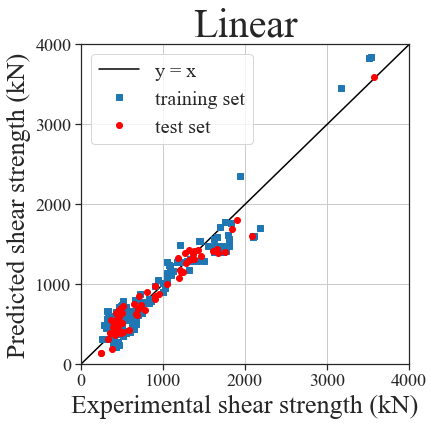

In [9]:
# plotting the scatter for the training and testing sets

plt.rcParams["font.family"] = "Times New Roman"

fig_scatter, axs_scatter = plt.subplots(3, 3, figsize = (20, 20))

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
ix = 0; iy = 0
axs_scatter[ix, iy].set_title('Linear', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_Linear, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_Linear, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)

In [10]:
mean_Linear = (Y_test_Linear/y_test).mean()
stdev_Linear =(Y_test_Linear/y_test).std()
print("Mean of Vtest/Vpred:", mean_Linear, "Standard deviation of Vtest/Vpred:", stdev_Linear)

Mean of Vtest/Vpred: 1.0163313240242944 Standard deviation of Vtest/Vpred: 0.2074354858049918


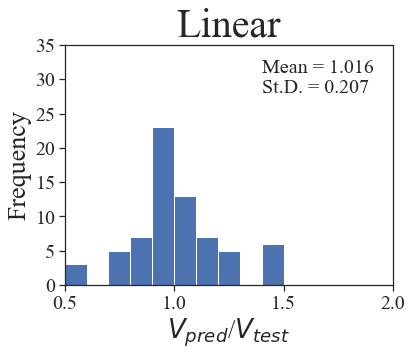

In [11]:
# plotting the histogram of V-pred/V-test values

fig_hist, axs_hist = plt.subplots(3, 3, figsize = (20, 15))

ix = 0; iy = 0
axs_hist[ix, iy].set_title('Linear', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_Linear/y_test, bins=np.arange(int(10*min(Y_test_Linear/y_test))/10, 
                                                 int(10*max(Y_test_Linear/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_Linear, 3)), fontsize=20)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_Linear, 3)), fontsize=20)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)

In [12]:
col_names =  ['Model', 'Training R2', 'Testing R2', 'Training RMSE (kN)', 'Testing RMSE (kN)', 'Training MAE (kN)', 
              'Testing MAE (kN)','mean(V-pred/V-test)', 'stdev(V-pred/V-test)']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison.loc[len(model_comparison)] = ('Linear', 
                                               round(Linear_regressor.score(X_train, y_train),3), 
                                               round(Linear_regressor.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_Linear)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_Linear)),2),
                                               round(mean_absolute_error(y_train, Y_train_Linear), 2),
                                               round(mean_absolute_error(y_test, Y_test_Linear), 2),
                                               round(mean_Linear, 3), 
                                               round(stdev_Linear, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207


# Decision Tree Regressor

In [13]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state = 11)

min_samples_split = list(range(2, 11, 1))
max_depth = list(range(1, 14, 2))
min_samples_leaf = list(range(1, 11, 1))
max_leaf_nodes = list(range(10, 101, 10))

params = {'min_samples_split' : min_samples_split, 'max_depth' : max_depth, 'min_samples_leaf' : min_samples_leaf, 
          'max_leaf_nodes' : max_leaf_nodes}
grid_dt = GridSearchCV(estimator = dt_model,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_dt.fit(X_train, y_train)

# extract best estimator
print(grid_dt.best_params_)

# to test the best fit
print(grid_dt.score(X_train, y_train))
print(grid_dt.score(X_test, y_test))

{'max_depth': 9, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.9869236769779357
0.9633602194026003


In [14]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth = 9, max_leaf_nodes = 30, min_samples_leaf = 1, min_samples_split = 6,
                                 random_state = 11)

# training the model
dt_model.fit(X_train, y_train)

# predicting the results
Y_train_dt = dt_model.predict(X_train)
Y_test_dt = dt_model.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_dt), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_dt)),
      "MAE:", mean_absolute_error(y_train, Y_train_dt))
print("Testing R2:", r2_score(y_test, Y_test_dt), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_dt)),
      "MAE:", mean_absolute_error(y_test, Y_test_dt))

Training R2: 0.9869236769779357 RMSE: 69.76033304909352 MAE: 48.81200496252013
Testing R2: 0.9633602194026003 RMSE: 110.96076366165032 MAE: 80.67517801323429


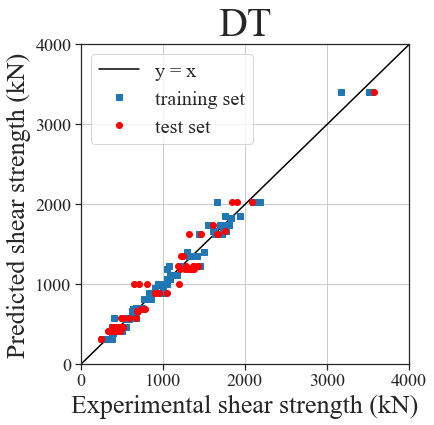

In [15]:
# plotting the scatter for the training and testing sets
ix = 0; iy = 1

axs_scatter[ix, iy].set_title('DT', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_dt, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_dt, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [16]:
mean_dt = (Y_test_dt/y_test).mean()
stdev_dt =(Y_test_dt/y_test).std()
print("Mean of Vtest/Vpred:", mean_dt, "Standard deviation of Vtest/Vpred:", stdev_dt)

Mean of Vtest/Vpred: 1.029426316917458 Standard deviation of Vtest/Vpred: 0.14055353273501764


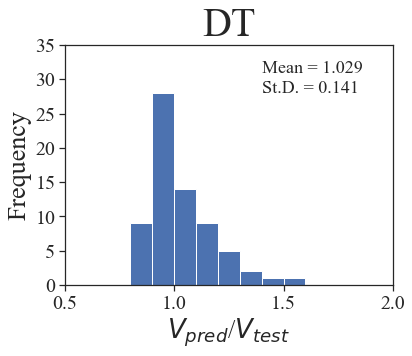

In [17]:
# plotting the histogram of V-pred/V-test values

ix = 0; iy = 1
axs_hist[ix, iy].set_title('DT', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_dt/y_test, bins=np.arange(int(10*min(Y_test_dt/y_test))/10, 
                                                 int(10*max(Y_test_dt/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_dt, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_dt, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [18]:
model_comparison.loc[len(model_comparison)] = ('DT', 
                                               round(dt_model.score(X_train, y_train),3), 
                                               round(dt_model.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_dt)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_dt)),2),
                                               round(mean_absolute_error(y_train, Y_train_dt), 2),
                                               round(mean_absolute_error(y_test, Y_test_dt), 2),
                                               round(mean_dt, 3), 
                                               round(stdev_dt, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141


# K Nearest Regressor

In [19]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

n_neighbors = list(range(2, 16, 1))
p = [1, 2, 3, 4]

params = {'n_neighbors' : n_neighbors, 'p' : p}
grid_knn = GridSearchCV(estimator = knn,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_knn.fit(X_train, y_train)

# extract best estimator
print(grid_knn.best_params_)

# to test the best fit
print(grid_knn.score(X_train, y_train))
print(grid_knn.score(X_test, y_test))

{'n_neighbors': 2, 'p': 2}
0.9815842636240311
0.9710614766809029


In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 2, p = 2)

# training the model
knn.fit(X_train, y_train)

# predicting the results
Y_train_knn = knn.predict(X_train)
Y_test_knn = knn.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_knn), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_knn)),
      "MAE:", mean_absolute_error(y_train, Y_train_knn))
print("Testing R2:", r2_score(y_test, Y_test_knn), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_knn)),
      "MAE:", mean_absolute_error(y_test, Y_test_knn))

Training R2: 0.9815842636240311 RMSE: 82.7866425298578 MAE: 42.042049689440994
Testing R2: 0.9710614766809029 RMSE: 98.61232261241236 MAE: 69.78289855072464


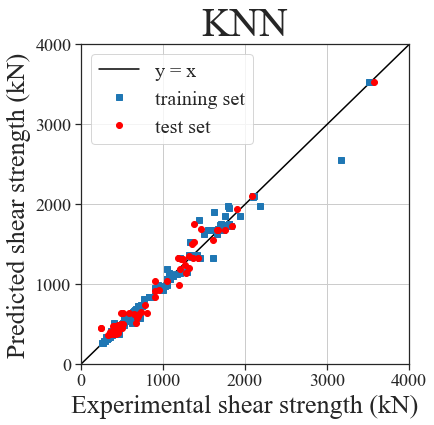

In [21]:
# plotting the scatter for the training and testing sets
ix = 0; iy = 2

axs_scatter[ix, iy].set_title('KNN', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_knn, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_knn, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [22]:
mean_knn = (Y_test_knn/y_test).mean()
stdev_knn =(Y_test_knn/y_test).std()
print("Mean of Vtest/Vpred:", mean_knn, "Standard deviation of Vtest/Vpred:", stdev_knn)

Mean of Vtest/Vpred: 1.0310992799281526 Standard deviation of Vtest/Vpred: 0.1787797291726166


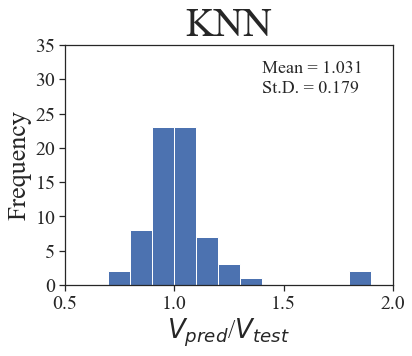

In [23]:
# plotting the histogram of V-pred/V-test values

ix = 0; iy = 2
axs_hist[ix, iy].set_title('KNN', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_knn/y_test, bins=np.arange(int(10*min(Y_test_knn/y_test))/10, 
                                                 int(10*max(Y_test_knn/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_knn, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_knn, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [24]:
model_comparison.loc[len(model_comparison)] = ('KNN', 
                                               round(knn.score(X_train, y_train),3), 
                                               round(knn.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_knn)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_knn)),2),
                                               round(mean_absolute_error(y_train, Y_train_knn), 2),
                                               round(mean_absolute_error(y_test, Y_test_knn), 2),
                                               round(mean_knn, 3), 
                                               round(stdev_knn, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141
2,KNN,0.982,0.971,82.79,98.61,42.04,69.78,1.031,0.179


# Support Vector Regressor

In [25]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3, 4, 5]
gamma = ['scale', 'auto']
C = [0.1, 1, 10, 100]


params = {'kernel' : kernel, 'degree' : degree, 'gamma' : gamma, 'C' : C}
grid_svr = GridSearchCV(estimator = svr,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_svr.fit(X_train, y_train)

# extract best estimator
print(grid_svr.best_params_)

# to test the best fit
print(grid_svr.score(X_train, y_train))
print(grid_svr.score(X_test, y_test))

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
0.9014886787956219
0.9134996228130395


In [26]:
from sklearn.svm import SVR

svr = SVR(C = 10, kernel = 'linear')

# training the model
svr.fit(X_train, y_train)

# predicting the results
Y_train_svr = svr.predict(X_train)
Y_test_svr = svr.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_svr), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_svr)),
      "MAE:", mean_absolute_error(y_train, Y_train_svr))
print("Testing R2:", r2_score(y_test, Y_test_svr), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_svr)),
      "MAE:", mean_absolute_error(y_test, Y_test_svr))

Training R2: 0.9014886787956219 RMSE: 191.47355338156368 MAE: 129.85402502072276
Testing R2: 0.9134996228130395 RMSE: 170.49121486377598 MAE: 118.65800184361561


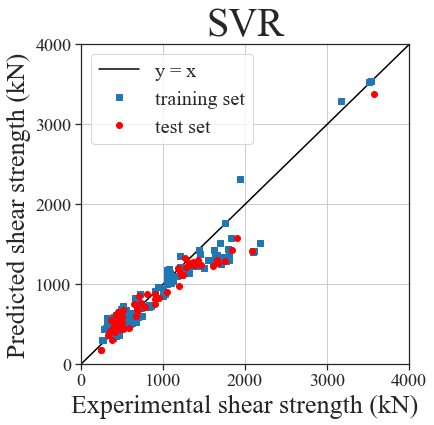

In [27]:
# plotting the scatter for the training and testing sets
ix = 1; iy = 0

axs_scatter[ix, iy].set_title('SVR', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_svr, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_svr, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [28]:
mean_svr = (Y_test_svr/y_test).mean()
stdev_svr =(Y_test_svr/y_test).std()
print("Mean of Vtest/Vpred:", mean_svr, "Standard deviation of Vtest/Vpred:", stdev_svr)

Mean of Vtest/Vpred: 0.99972593238899 Standard deviation of Vtest/Vpred: 0.18247493071734158


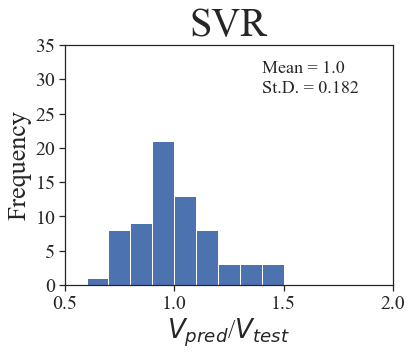

In [29]:
# plotting the histogram of V-pred/V-test values

ix = 1; iy = 0
axs_hist[ix, iy].set_title('SVR', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_svr/y_test, bins=np.arange(int(10*min(Y_test_svr/y_test))/10, 
                                                 int(10*max(Y_test_svr/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_svr, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_svr, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [30]:
model_comparison.loc[len(model_comparison)] = ('SVR', 
                                               round(svr.score(X_train, y_train),3), 
                                               round(svr.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_svr)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_svr)),2),
                                               round(mean_absolute_error(y_train, Y_train_svr), 2),
                                               round(mean_absolute_error(y_test, Y_test_svr), 2),
                                               round(mean_svr, 3), 
                                               round(stdev_svr, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141
2,KNN,0.982,0.971,82.79,98.61,42.04,69.78,1.031,0.179
3,SVR,0.901,0.913,191.47,170.49,129.85,118.66,1.000,0.182


# Random Forest Regressor

In [31]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

n_estimators = list(range(0, 101, 2))
max_features = [2, 4, 6]
max_depths = [4, 10, 12, 16]

params = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depths}
grid_rfr = GridSearchCV(estimator = rfr,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_rfr.fit(X_train, y_train)

# extract best estimator
print(grid_rfr.best_params_)

# to test the best fit
print(grid_rfr.score(X_test, y_test))

{'max_depth': 10, 'max_features': 4, 'n_estimators': 76}
0.9796230887661087


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


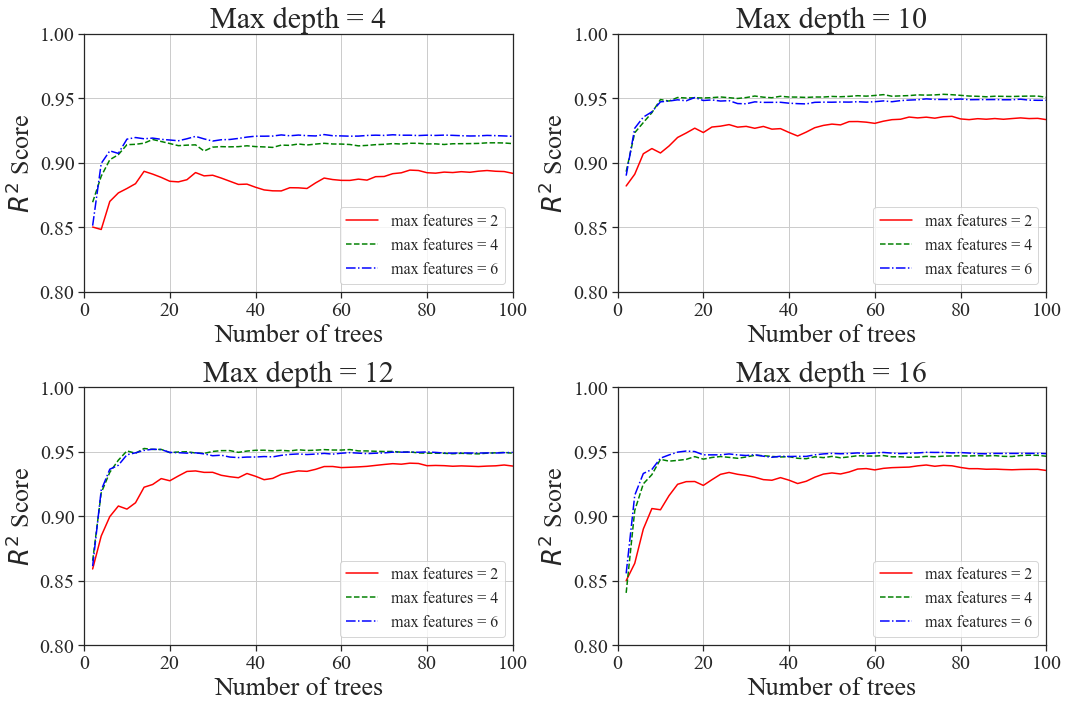

In [32]:
# Graph grid scores from GridSearchCV

cv_data_rfr = pd.DataFrame(grid_rfr.cv_results_)

fig, axes = plt.subplots(2, 2,  figsize = (15, 10))

from itertools import cycle
lines = ["-","--","-."]
linecycler = cycle(lines)
colors = ['red', 'green', 'blue']
colorcycler = cycle(colors)

for idx, val in enumerate(max_depths):
    for name, group in cv_data_rfr.loc[cv_data_rfr["param_max_depth"] == val].groupby('param_max_features'):
        group.plot(x = 'param_n_estimators', y = 'mean_test_score', ax = axes[idx//2, int(2*(idx/2-idx//2))],
                    style = next(linecycler), color = next(colorcycler),label = 'max features = ' + str(name), 
                    xlim = (0, 100))

    axes[idx//2, int(2*(idx/2-idx//2))].set_title('Max depth = ' + str (val), fontsize=30)
    axes[idx//2, int(2*(idx/2-idx//2))].set_xlabel('Number of trees', fontsize=26)
    axes[idx//2, int(2*(idx/2-idx//2))].set_ylabel('$R^2$ Score', fontsize=26)
    axes[idx//2, int(2*(idx/2-idx//2))].set_yticks(np.arange(0.8, 1.05, 0.05))
    axes[idx//2, int(2*(idx/2-idx//2))].legend(loc='lower right', fontsize = 16)
    axes[idx//2, int(2*(idx/2-idx//2))].grid()

fig.tight_layout()
plt.savefig('hyperparameters-RF.eps', format='eps')

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 10, max_features = 4, n_estimators = 76, random_state = 42)

# training the model
rfr.fit(X_train, y_train)

# predicting the results
Y_train_rfr = rfr.predict(X_train)
Y_test_rfr = rfr.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_rfr), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_rfr)),
      "MAE:", mean_absolute_error(y_train, Y_train_rfr))
print("Testing R2:", r2_score(y_test, Y_test_rfr), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_rfr)),
      "MAE:", mean_absolute_error(y_test, Y_test_rfr))

Training R2: 0.9946385834092031 RMSE: 44.668925127226956 MAE: 28.142033629474493
Testing R2: 0.9796230887661087 RMSE: 82.74889090808017 MAE: 53.369121318992256


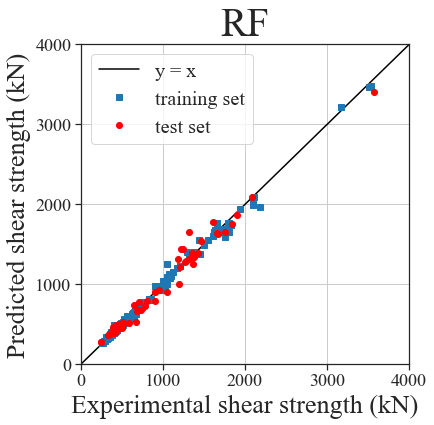

In [34]:
# plotting the scatter for the training and testing sets
ix = 1; iy = 1

axs_scatter[ix, iy].set_title('RF', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_rfr, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_rfr, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [35]:
mean_rfr = (Y_test_rfr/y_test).mean()
stdev_rfr =(Y_test_rfr/y_test).std()
print("Mean of Vtest/Vpred:", mean_rfr, "Standard deviation of Vtest/Vpred:", stdev_rfr)

Mean of Vtest/Vpred: 1.0184230129049225 Standard deviation of Vtest/Vpred: 0.08637476393704313


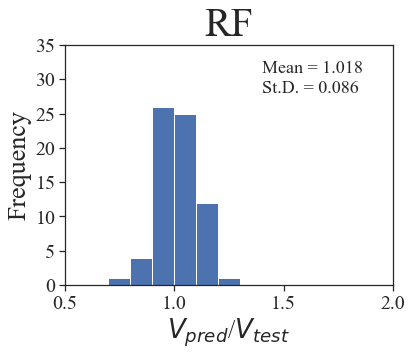

In [36]:
# plotting the histogram of V-pred/V-test values

ix = 1; iy = 1
axs_hist[ix, iy].set_title('RF', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_rfr/y_test, bins=np.arange(int(10*min(Y_test_rfr/y_test))/10, 
                                                 int(10*max(Y_test_rfr/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_rfr, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_rfr, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [37]:
model_comparison.loc[len(model_comparison)] = ('RF', 
                                               round(rfr.score(X_train, y_train),3), 
                                               round(rfr.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_rfr)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_rfr)),2),
                                               round(mean_absolute_error(y_train, Y_train_rfr), 2),
                                               round(mean_absolute_error(y_test, Y_test_rfr), 2),
                                               round(mean_rfr, 3), 
                                               round(stdev_rfr, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141
2,KNN,0.982,0.971,82.79,98.61,42.04,69.78,1.031,0.179
3,SVR,0.901,0.913,191.47,170.49,129.85,118.66,1.000,0.182
4,RF,0.995,0.980,44.67,82.75,28.14,53.37,1.018,0.086


# Bagging Regressor

In [38]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(random_state = 11)

n_estimators = list(range(10, 101, 10))
max_features = [0.3, 0.5, 0.7, 1.0]
max_samples = [0.3, 0.5,0.7, 1.0]

params = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_samples' : max_samples}
grid_bagging = GridSearchCV(estimator = bagging,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_bagging.fit(X_train, y_train)

# extract best estimator
print(grid_bagging.best_params_)

# to test the best fit
print(grid_bagging.score(X_test, y_test))

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}
0.9786155404250233


In [39]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(max_features = 1.0, max_samples = 1.0, n_estimators = 20, random_state = 11)

# training the model
bagging.fit(X_train, y_train)

# predicting the results
Y_train_bagging = bagging.predict(X_train)
Y_test_bagging = bagging.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_bagging), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_bagging)),
      "MAE:", mean_absolute_error(y_train, Y_train_bagging))
print("Testing R2:", r2_score(y_test, Y_test_bagging), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_bagging)),
      "MAE:", mean_absolute_error(y_test, Y_test_bagging))

Training R2: 0.9938291264453889 RMSE: 47.922453971087755 MAE: 28.817723602484463
Testing R2: 0.9786155404250233 RMSE: 84.76999244569245 MAE: 58.39659178743961


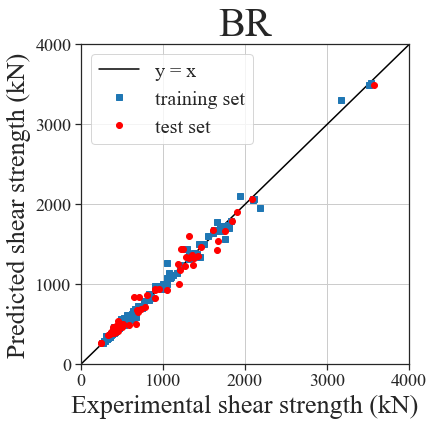

In [40]:
# plotting the scatter for the training and testing sets
ix = 1; iy = 2

axs_scatter[ix, iy].set_title('BR', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_bagging, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_bagging, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [41]:
mean_bagging = (Y_test_bagging/y_test).mean()
stdev_bagging =(Y_test_bagging/y_test).std()
print("Mean of Vtest/Vpred:", mean_bagging, "Standard deviation of Vtest/Vpred:", stdev_bagging)

Mean of Vtest/Vpred: 1.014259659225796 Standard deviation of Vtest/Vpred: 0.09644004456251141


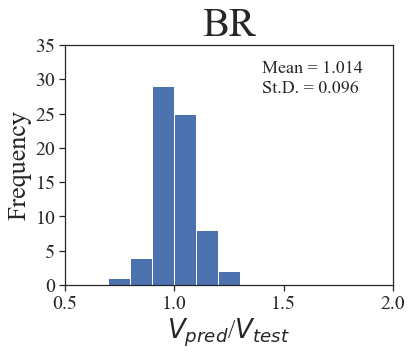

In [42]:
# plotting the histogram of V-pred/V-test values

ix = 1; iy = 2
axs_hist[ix, iy].set_title('BR', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_bagging/y_test, bins=np.arange(int(10*min(Y_test_bagging/y_test))/10, 
                                                 int(10*max(Y_test_bagging/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_bagging, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_bagging, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [43]:
model_comparison.loc[len(model_comparison)] = ('BR', 
                                               round(bagging.score(X_train, y_train),3), 
                                               round(bagging.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_bagging)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_bagging)),2),
                                               round(mean_absolute_error(y_train, Y_train_bagging), 2),
                                               round(mean_absolute_error(y_test, Y_test_bagging), 2),
                                               round(mean_bagging, 3), 
                                               round(stdev_bagging, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141
2,KNN,0.982,0.971,82.79,98.61,42.04,69.78,1.031,0.179
3,SVR,0.901,0.913,191.47,170.49,129.85,118.66,1.000,0.182
4,RF,0.995,0.980,44.67,82.75,28.14,53.37,1.018,0.086
5,BR,0.994,0.979,47.92,84.77,28.82,58.40,1.014,0.096


# ADA Boosting Regressor

In [44]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(random_state = 11)

n_estimators = list(range(0, 101, 5))
learning_rates = [ 0.05, 0.2, 0.5, 1]
loss = ['linear', 'square', 'exponential']

params = {'n_estimators' : n_estimators, 'learning_rate' : learning_rates, 'loss' : loss}
grid_adaboost = GridSearchCV(estimator = adaboost,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_adaboost.fit(X_train, y_train)

# extract best estimator
print(grid_adaboost.best_params_)

# to test the best fit
print(grid_adaboost.score(X_train, y_train))
print(grid_adaboost.score(X_test, y_test))

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 45}
0.9642876364079578
0.9568699607232394


In [45]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators = 45, learning_rate = 1, loss = 'exponential', random_state = 11)

# training the model
adaboost.fit(X_train, y_train)

# predicting the results
Y_train_adaboost = adaboost.predict(X_train)
Y_test_adaboost = adaboost.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_adaboost), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_adaboost)),
      "MAE:", mean_absolute_error(y_train, Y_train_adaboost))
print("Testing R2:", r2_score(y_test, Y_test_adaboost), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_adaboost)),
      "MAE:", mean_absolute_error(y_test, Y_test_adaboost))

Training R2: 0.9642876364079578 RMSE: 115.28558891966668 MAE: 95.74821027674105
Testing R2: 0.9568699607232394 RMSE: 120.38792571592552 MAE: 98.91063985396646


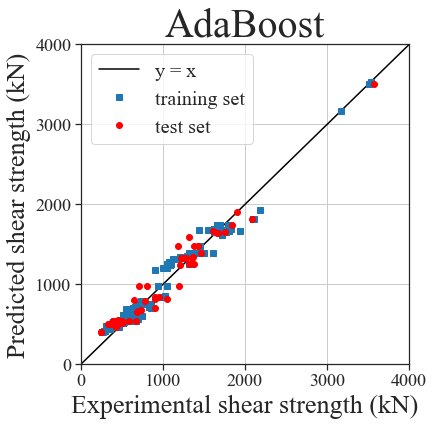

In [46]:
# plotting the scatter for the training and testing sets
ix = 2; iy = 0

axs_scatter[ix, iy].set_title('AdaBoost', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_adaboost, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_adaboost, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [47]:
mean_adaboost = (Y_test_adaboost/y_test).mean()
stdev_adaboost =(Y_test_adaboost/y_test).std()
print("Mean of Vtest/Vpred:", mean_adaboost, "Standard deviation of Vtest/Vpred:", stdev_adaboost)

Mean of Vtest/Vpred: 1.1130947064099346 Standard deviation of Vtest/Vpred: 0.19757223846451566


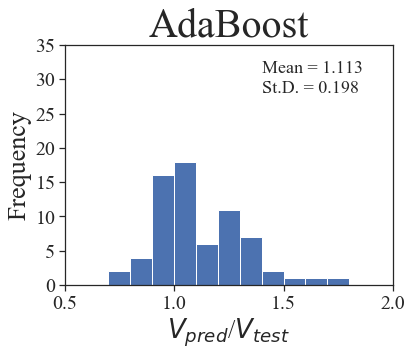

In [48]:
# plotting the histogram of V-pred/V-test values

ix = 2; iy = 0
axs_hist[ix, iy].set_title('AdaBoost', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_adaboost/y_test, bins=np.arange(int(10*min(Y_test_adaboost/y_test))/10, 
                                                 int(10*max(Y_test_adaboost/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_adaboost, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_adaboost, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [49]:
model_comparison.loc[len(model_comparison)] = ('AdaBoost', 
                                               round(adaboost.score(X_train, y_train),3), 
                                               round(adaboost.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_adaboost)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_adaboost)),2),
                                               round(mean_absolute_error(y_train, Y_train_adaboost), 2),
                                               round(mean_absolute_error(y_test, Y_test_adaboost), 2),
                                               round(mean_adaboost, 3), 
                                               round(stdev_adaboost, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141
2,KNN,0.982,0.971,82.79,98.61,42.04,69.78,1.031,0.179
3,SVR,0.901,0.913,191.47,170.49,129.85,118.66,1.000,0.182
4,RF,0.995,0.980,44.67,82.75,28.14,53.37,1.018,0.086
5,BR,0.994,0.979,47.92,84.77,28.82,58.40,1.014,0.096
6,AdaBoost,0.964,0.957,115.29,120.39,95.75,98.91,1.113,0.198


# Gradient Boosting Regression Tree

In [50]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(random_state = 11)

n_estimators = list(range(0, 601, 20))
learning_rates = [0.02, 0.05, 0.1, 0.2]
max_depths = [3, 4, 5, 6]

params = {'n_estimators' : n_estimators, 'learning_rate' : learning_rates, 'max_depth' : max_depths}
grid_gradboost = GridSearchCV(estimator = gradboost,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_gradboost.fit(X_train, y_train)

# extract best estimator
print(grid_gradboost.best_params_)

# to test the best fit
print(grid_gradboost.score(X_train, y_train))
print(grid_gradboost.score(X_test, y_test))

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 60}
0.9980163072596103
0.9856255682766377


In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, n_estimators = 60, random_state = 11)

# training the model
gradboost.fit(X_train, y_train)

# predicting the results
Y_train_gradboost = gradboost.predict(X_train)
Y_test_gradboost = gradboost.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_gradboost), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_gradboost)),
      "MAE:", mean_absolute_error(y_train, Y_train_gradboost))
print("Testing R2:", r2_score(y_test, Y_test_gradboost), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_gradboost)),
      "MAE:", mean_absolute_error(y_test, Y_test_gradboost))

Training R2: 0.9980163072596103 RMSE: 27.170831371983557 MAE: 19.386283350713086
Testing R2: 0.9856255682766377 RMSE: 69.50056689095624 MAE: 48.916915404633876


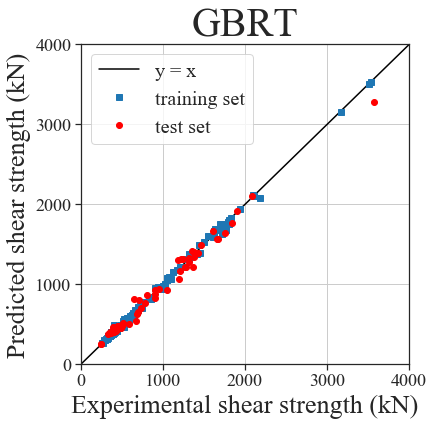

In [52]:
# plotting the scatter for the training and testing sets
ix = 2; iy = 1

axs_scatter[ix, iy].set_title('GBRT', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_gradboost, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_gradboost, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [53]:
mean_gradboost = (Y_test_gradboost/y_test).mean()
stdev_gradboost =(Y_test_gradboost/y_test).std()
print("Mean of Vtest/Vpred:", mean_gradboost, "Standard deviation of Vtest/Vpred:", stdev_gradboost)

Mean of Vtest/Vpred: 1.0053643748284709 Standard deviation of Vtest/Vpred: 0.07845745709172727


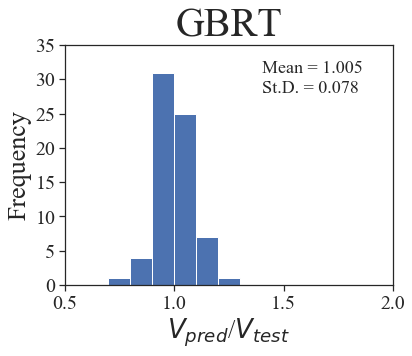

In [54]:
# plotting the histogram of V-pred/V-test values

ix = 2; iy = 1
axs_hist[ix, iy].set_title('GBRT', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_gradboost/y_test, bins=np.arange(int(10*min(Y_test_gradboost/y_test))/10, 
                                                 int(10*max(Y_test_gradboost/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_gradboost, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_gradboost, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [55]:
model_comparison.loc[len(model_comparison)] = ('GBRT', 
                                               round(gradboost.score(X_train, y_train),3), 
                                               round(gradboost.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_gradboost)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_gradboost)),2),
                                               round(mean_absolute_error(y_train, Y_train_gradboost), 2),
                                               round(mean_absolute_error(y_test, Y_test_gradboost), 2),
                                               round(mean_gradboost, 3), 
                                               round(stdev_gradboost, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141
2,KNN,0.982,0.971,82.79,98.61,42.04,69.78,1.031,0.179
3,SVR,0.901,0.913,191.47,170.49,129.85,118.66,1.000,0.182
4,RF,0.995,0.980,44.67,82.75,28.14,53.37,1.018,0.086
5,BR,0.994,0.979,47.92,84.77,28.82,58.40,1.014,0.096
6,AdaBoost,0.964,0.957,115.29,120.39,95.75,98.91,1.113,0.198
7,GBRT,0.998,0.986,27.17,69.50,19.39,48.92,1.005,0.078


# Extreme Gradient Boosting (XGBoost)

In [56]:
# Hyperparameter Optimization with Grid Search
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgboost_model = xgb.XGBRegressor()

n_estimators = list(range(0, 501, 20))
learning_rates = [0.02, 0.05, 0.1, 0.2]
max_depths = [3, 4, 5, 6]

params = {'n_estimators' : n_estimators, 'learning_rate' : learning_rates, 'max_depth' : max_depths}
grid_xgboost = GridSearchCV(estimator = xgboost_model,
                        param_grid = params,
                        scoring = 'r2', 
                        cv = 5, 
                        n_jobs = -1)
grid_xgboost.fit(X_train, y_train)

# extract best estimator
print(grid_xgboost.best_params_)

# to test the best fit
print(grid_xgboost.score(X_train, y_train))
print(grid_xgboost.score(X_test, y_test))

[12:16:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 60}
0.9988875825236713
0.9861080447654204


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


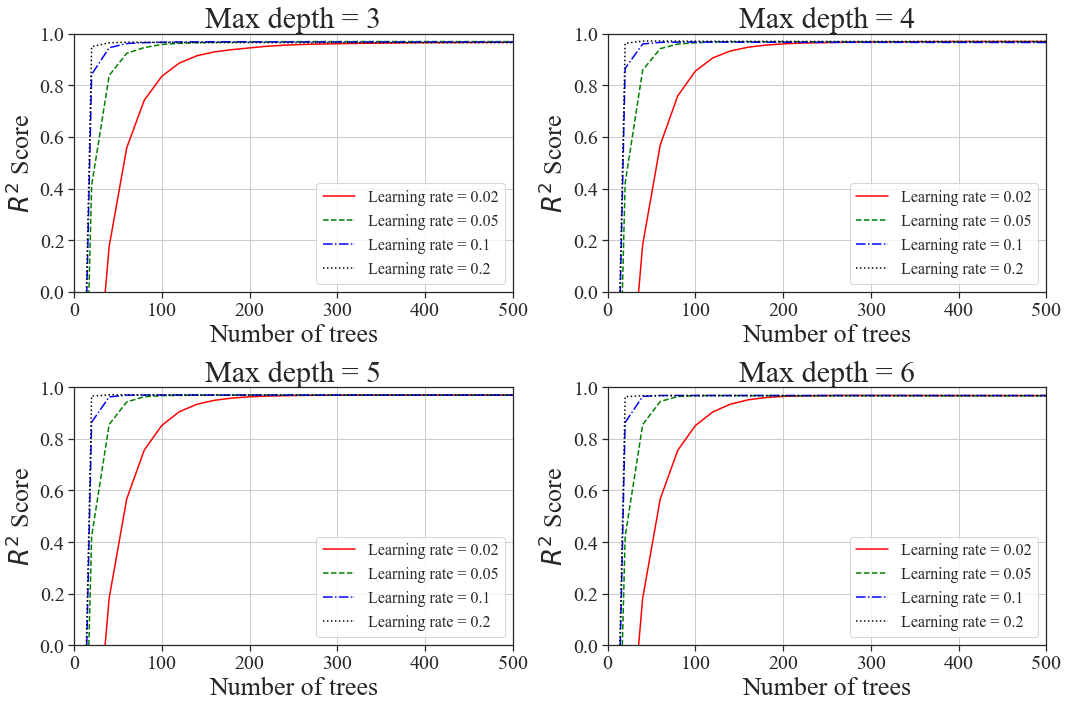

In [57]:
# Graph grid scores from GridSearchCV

cv_data_xgboost = pd.DataFrame(grid_xgboost.cv_results_)

fig, axes = plt.subplots(2, 2,  figsize = (15, 10))

from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
colors = ['red', 'green', 'blue', 'black']
colorcycler = cycle(colors)

for idx, val in enumerate(max_depths):
    for name, group in cv_data_xgboost.loc[cv_data_xgboost["param_max_depth"] == val].groupby('param_learning_rate'):
        group.plot(x = 'param_n_estimators', y = 'mean_test_score', ax = axes[idx//2, int(2*(idx/2-idx//2))],
                    style = next(linecycler), color = next(colorcycler),label = 'Learning rate = ' + str(name), 
                    xlim = (0, 500), ylim = (0,1))

    axes[idx//2, int(2*(idx/2-idx//2))].set_title('Max depth = ' + str (val), fontsize=30)
    axes[idx//2, int(2*(idx/2-idx//2))].set_xlabel('Number of trees', fontsize=26)
    axes[idx//2, int(2*(idx/2-idx//2))].set_ylabel('$R^2$ Score', fontsize=26)
    axes[idx//2, int(2*(idx/2-idx//2))].legend(loc='lower right', fontsize = 16)
    axes[idx//2, int(2*(idx/2-idx//2))].grid()

fig.tight_layout()
plt.savefig('hyperparameters-XGBoost.eps', format='eps')

In [58]:
import xgboost as xgb
xgboost_model = xgb.XGBRegressor(n_estimators=60, learning_rate=0.2, max_depth=4)

# training the model
xgboost_model.fit(X_train, y_train)

# predicting the results
Y_train_xgboost = xgboost_model.predict(X_train)
Y_test_xgboost = xgboost_model.predict(X_test)

print("Training R2:", r2_score(y_train, Y_train_xgboost), "RMSE:", np.sqrt(mean_squared_error(y_train, Y_train_xgboost)),
      "MAE:", mean_absolute_error(y_train, Y_train_xgboost))
print("Testing R2:", r2_score(y_test, Y_test_xgboost), "RMSE:", np.sqrt(mean_squared_error(y_test, Y_test_xgboost)),
      "MAE:", mean_absolute_error(y_test, Y_test_xgboost))

[12:16:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training R2: 0.9988875825236713 RMSE: 20.34696447004946 MAE: 14.346874173561236
Testing R2: 0.9861080447654204 RMSE: 68.32422156846984 MAE: 47.22799702077672


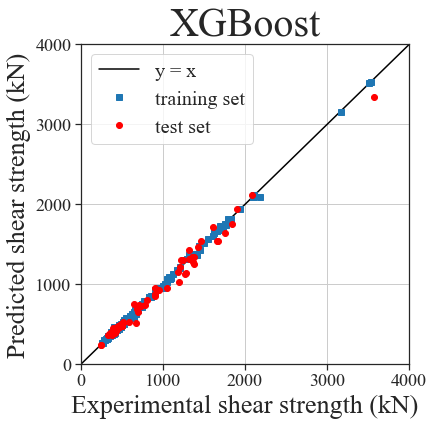

In [59]:
# plotting the scatter for the training and testing sets
ix = 2; iy = 2

axs_scatter[ix, iy].set_title('XGBoost', fontsize = 40, fontweight ="bold")
axs_scatter[ix, iy].set_xlim(0, 4000)
axs_scatter[ix, iy].set_ylim(0, 4000)
axs_scatter[ix, iy].set_yticks(np.arange(0, 4001, 1000))
axs_scatter[ix, iy].set_xlabel('Experimental shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].set_ylabel('Predicted shear strength (kN)', fontsize = 26)
axs_scatter[ix, iy].plot([0, 4000], [0, 4000], color='black')
axs_scatter[ix, iy].plot(y_train, Y_train_xgboost, 's', color='tab:blue')
axs_scatter[ix, iy].plot(y_test, Y_test_xgboost, 'o', color='red')
axs_scatter[ix, iy].legend(['y = x','training set', 'test set'], loc='upper left', fontsize = 20)
axs_scatter[ix, iy].grid();

axs_scatter[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_scatter[idx, idy].set_visible(False)
fig_scatter

In [60]:
mean_xgboost = (Y_test_xgboost/y_test).mean()
stdev_xgboost =(Y_test_xgboost/y_test).std()
print("Mean of Vtest/Vpred:", mean_xgboost, "Standard deviation of Vtest/Vpred:", stdev_xgboost)

Mean of Vtest/Vpred: 0.9975886531956782 Standard deviation of Vtest/Vpred: 0.06881756662329372


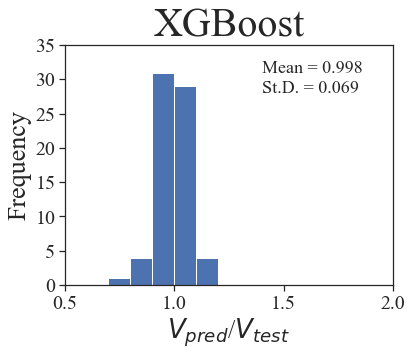

In [61]:
# plotting the histogram of V-pred/V-test values

ix = 2; iy = 2
axs_hist[ix, iy].set_title('XGBoost', fontsize = 40, fontweight ="bold")
axs_hist[ix, iy].hist(Y_test_xgboost/y_test, bins=np.arange(int(10*min(Y_test_xgboost/y_test))/10, 
                                                 int(10*max(Y_test_xgboost/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].set_xlabel('$V_{pred}$/$V_{test}$', fontsize = 26)
axs_hist[ix, iy].set_ylabel('Frequency', fontsize = 26)
axs_hist[ix, iy].set_xlim(0.5, 2)
axs_hist[ix, iy].set_ylim(0, 35)
axs_hist[ix, iy].set_xticks(np.arange(0.5, 2.5, 0.5))
axs_hist[ix, iy].set_yticks(np.arange(0, 40, 5))
#axs_hist[ix, iy].set_xticks(np.arange(int(10*min(Y_test_xgboost/y_test))/10,
#                                      int(10*max(Y_test_xgboost/y_test))/10+0.2 , 0.1))
axs_hist[ix, iy].text(1.4 , 31, 'Mean = '+str(round(mean_xgboost, 3)), fontsize=18)
axs_hist[ix, iy].text(1.4 , 28, 'St.D. = '+str(round(stdev_xgboost, 3)), fontsize=18)

axs_hist[ix, iy].set_visible(True)
for idx in range(0, 3):
    for idy in range (0, 3):
        if idx != ix or idy != iy: axs_hist[idx, idy].set_visible(False)
fig_hist

In [62]:
model_comparison.loc[len(model_comparison)] = ('XGBoost', 
                                               round(xgboost_model.score(X_train, y_train),3), 
                                               round(xgboost_model.score(X_test, y_test),3),
                                               round(np.sqrt(mean_squared_error(y_train, Y_train_xgboost)),2),
                                               round(np.sqrt(mean_squared_error(y_test, Y_test_xgboost)),2),
                                               round(mean_absolute_error(y_train, Y_train_xgboost), 2),
                                               round(mean_absolute_error(y_test, Y_test_xgboost), 2),
                                               round(mean_xgboost, 3), 
                                               round(stdev_xgboost, 3))
model_comparison

,Model,Training R2,Testing R2,Training RMSE (kN),Testing RMSE (kN),Training MAE (kN),Testing MAE (kN),mean(V-pred/V-test),stdev(V-pred/V-test)
0,Linear,0.924,0.949,167.73,131.36,129.19,98.46,1.016,0.207
1,DT,0.987,0.963,69.76,110.96,48.81,80.68,1.029,0.141
2,KNN,0.982,0.971,82.79,98.61,42.04,69.78,1.031,0.179
3,SVR,0.901,0.913,191.47,170.49,129.85,118.66,1.000,0.182
4,RF,0.995,0.980,44.67,82.75,28.14,53.37,1.018,0.086
5,BR,0.994,0.979,47.92,84.77,28.82,58.40,1.014,0.096
6,AdaBoost,0.964,0.957,115.29,120.39,95.75,98.91,1.113,0.198
7,GBRT,0.998,0.986,27.17,69.50,19.39,48.92,1.005,0.078
8,XGBoost,0.999,0.986,20.35,68.32,14.35,47.23,0.998,0.069


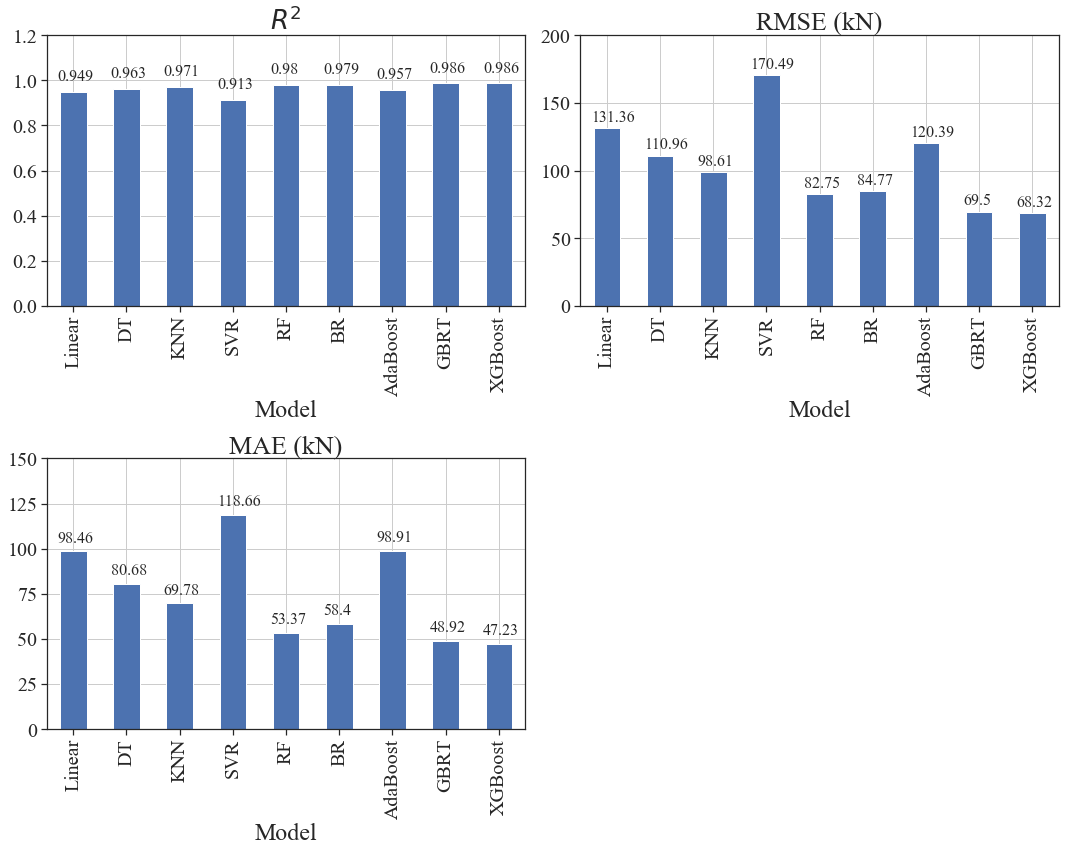

In [63]:
# Performance metrics for ML models (for the testing dataset)
fig, axes = plt.subplots(2, 2,  figsize = (15, 12))

model_comparison.plot.bar(x='Model', y='Testing R2', fontsize=15, ax=axes[0, 0], legend=False, ylim = (0,1.2))
axes[0, 0].set_title('$R^2$', fontsize=26)
axes[0, 0].set_xlabel('Model', fontsize = 24)
axes[0, 0].tick_params(axis='both', labelsize=20)
axes[0, 0].set_yticks(np.arange(0, 1.21, 0.2))
for i, v in enumerate(model_comparison['Testing R2']):
    axes[0, 0].text(i-0.3 , v+0.05, str(v), fontsize = 16)
model_comparison.plot.bar(x='Model', y='Testing RMSE (kN)', fontsize=15, ax=axes[0, 1], legend=False, ylim = (0,200))
axes[0, 1].set_title('RMSE (kN)', fontsize=26)
axes[0, 1].set_xlabel('Model', fontsize = 24)
axes[0, 1].tick_params(axis='both', labelsize=20)
for i, v in enumerate(model_comparison['Testing RMSE (kN)']):
    axes[0, 1].text(i-0.3 , v+5 , str(v), fontsize = 16)
model_comparison.plot.bar(x='Model', y='Testing MAE (kN)', fontsize=15, ax=axes[1, 0], legend=False, ylim = (0,150))
axes[1, 0].set_title('MAE (kN)', fontsize=26)
axes[1, 0].set_xlabel('Model', fontsize = 24)
axes[1, 0].tick_params(axis='both', labelsize=20)
for i, v in enumerate(model_comparison['Testing MAE (kN)']):
    axes[1, 0].text(i-0.3 , v+5 , str(v), fontsize = 16)

axes[0, 0].grid()
axes[0, 1].grid()
axes[1, 0].grid()
axes[1, 1].set_visible(False)    
fig.tight_layout()
plt.savefig('performance metrics.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

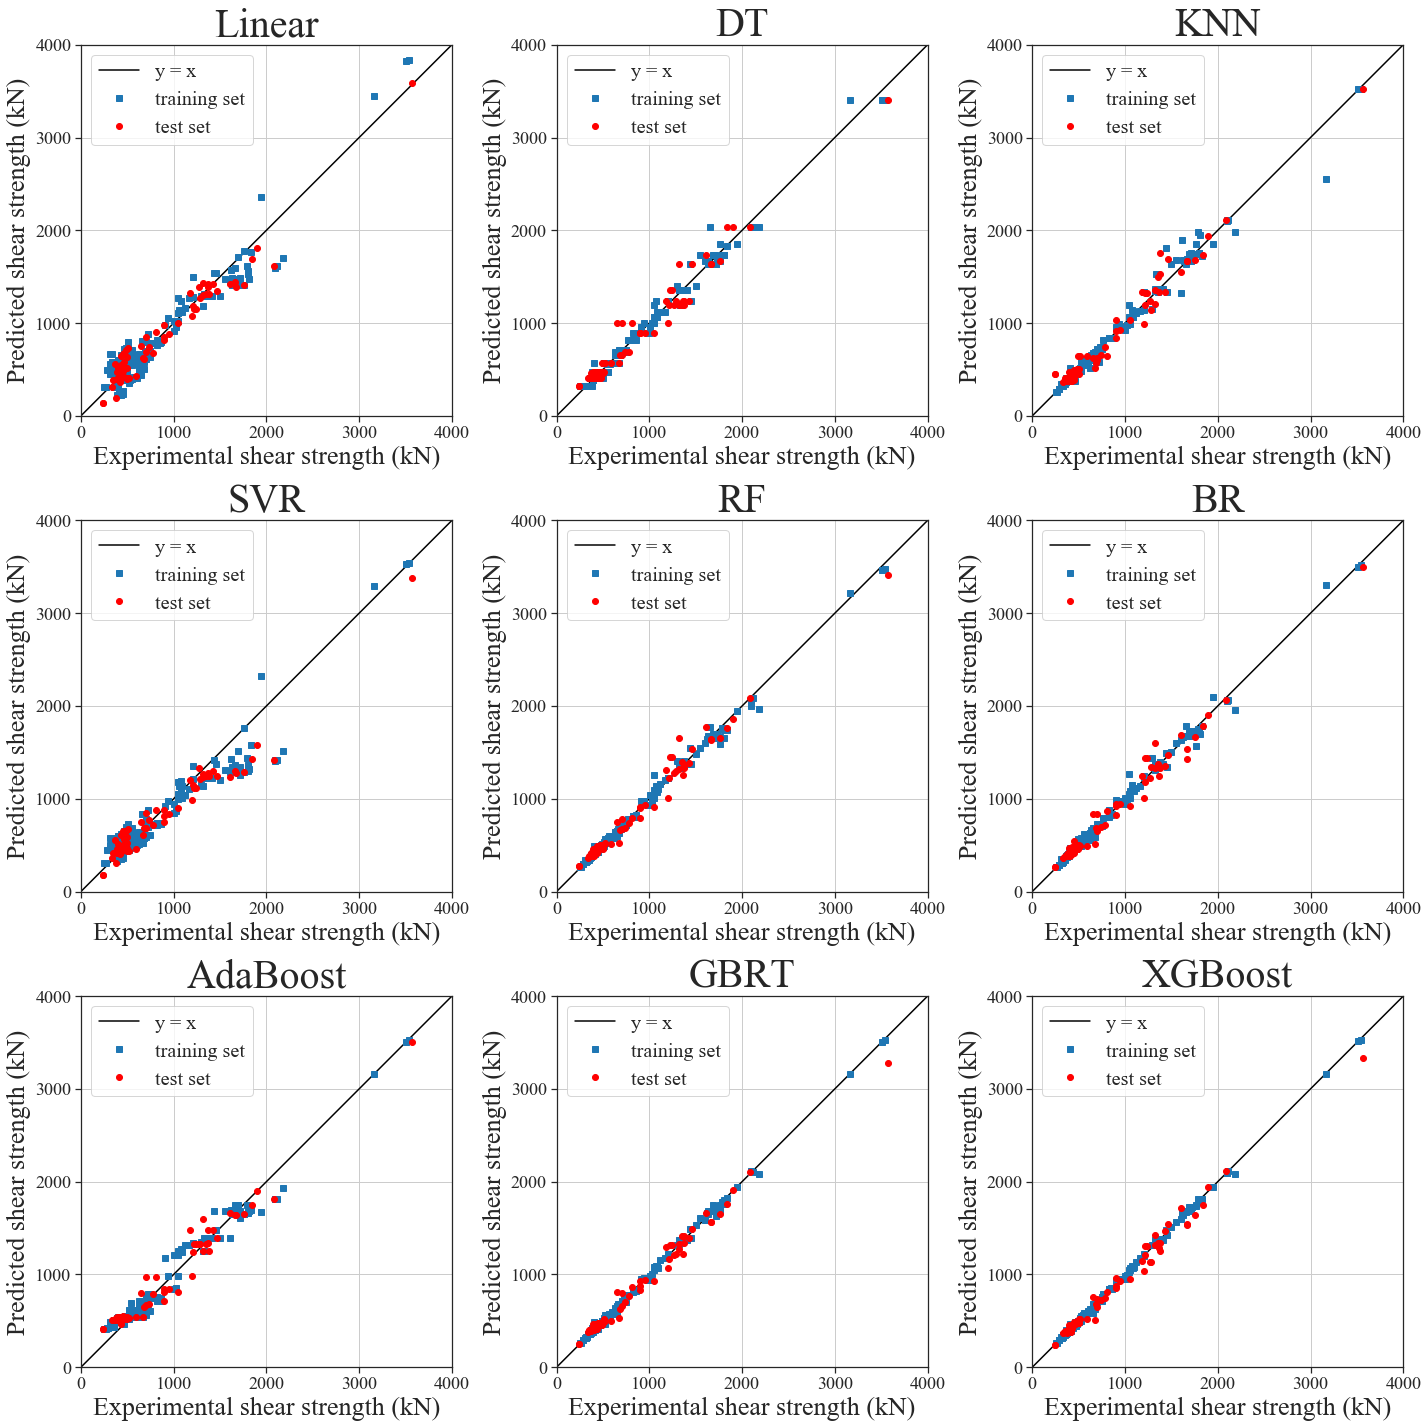

In [64]:
# plotting the scatter for the training and testing sets for all ML models

for idx in range(0, 3):
    for idy in range (0, 3):
        axs_scatter[idx, idy].set_visible(True)
fig_scatter.tight_layout()
fig_scatter.savefig('scatter plot.eps', format='eps')
fig_scatter

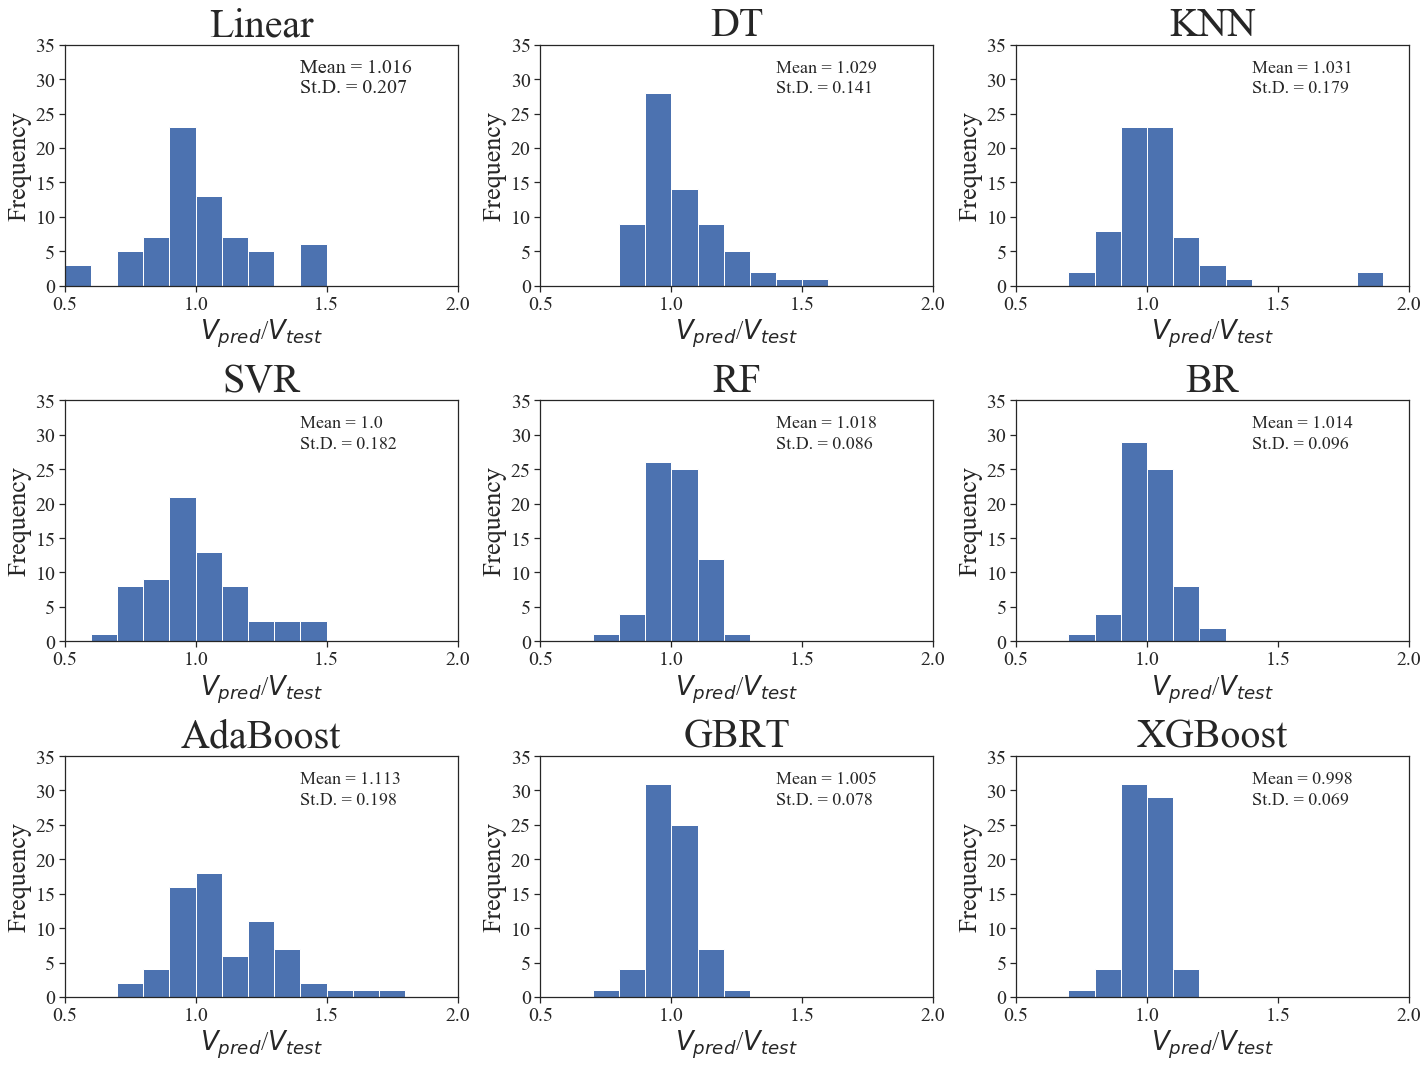

In [65]:
# plotting the histogram of V-pred/V-test values for all ML Models

for idx in range(0, 3):
    for idy in range (0, 3):
        axs_hist[idx, idy].set_visible(True)
fig_hist.tight_layout()
fig_hist.savefig('histogram plot.eps', format='eps')
fig_hist

Based on the obtained results the performance of XGBoost model is better than all other ML models.

# Comparing XGBoost model with empirical models

In [66]:
# impoting the empirical model results database

em_data = pd.read_excel('Empirical equations data.xlsx', sheet_name='Sheet1')
em_data.head()

,Authors,specimen,D(mm),t(mm),P,P0 (kN),Ast (mm2),Ac (mm2),a/D,P/P0,...,V_Xiao(kN),V_Roeder (kN),V_Mansouri (kN),V_AISC/Vexp,V_EC4/Vexp,V_Qian/Vexp,V_Xu/Vexp,V_Xiao/Vexp,V_Roeder/Vexp,V_Mansouri/Vexp
0,Qian et al. (2007),A1-11,194.0,5.5,0.0,2086.227614,3255.395,26301.423375,0.1,0.000000,...,735.569734,714.031422,765.568317,0.321641,0.394066,0.720592,0.815364,0.734102,0.712606,0.764040
1,Qian et al. (2007),B1-11,194.0,7.5,0.0,2821.648259,4392.075,25164.200375,0.1,0.000000,...,1128.647075,1178.533146,1193.996978,0.461824,0.565816,0.803465,1.062581,0.937415,0.978848,0.991692
2,Qian et al. (2007),A1-21,194.0,5.5,900.0,2086.227614,3255.395,26301.423375,0.1,0.431401,...,812.762509,783.494634,1094.958390,0.248868,0.304907,0.887977,0.630884,0.627616,0.605015,0.845528
3,Qian et al. (2007),B1-21,194.0,7.5,1307.0,2821.648259,4392.075,25164.200375,0.1,0.463204,...,1240.748139,1244.992902,1653.784844,0.343657,0.421040,0.952962,0.790697,0.766841,0.769464,1.022117
4,Qian et al. (2007),A1-31,194.0,5.5,1500.0,2086.227614,3255.395,26301.423375,0.1,0.719001,...,864.224360,783.494634,1314.551772,0.200925,0.246169,0.716914,0.509348,0.538793,0.488463,0.819546


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

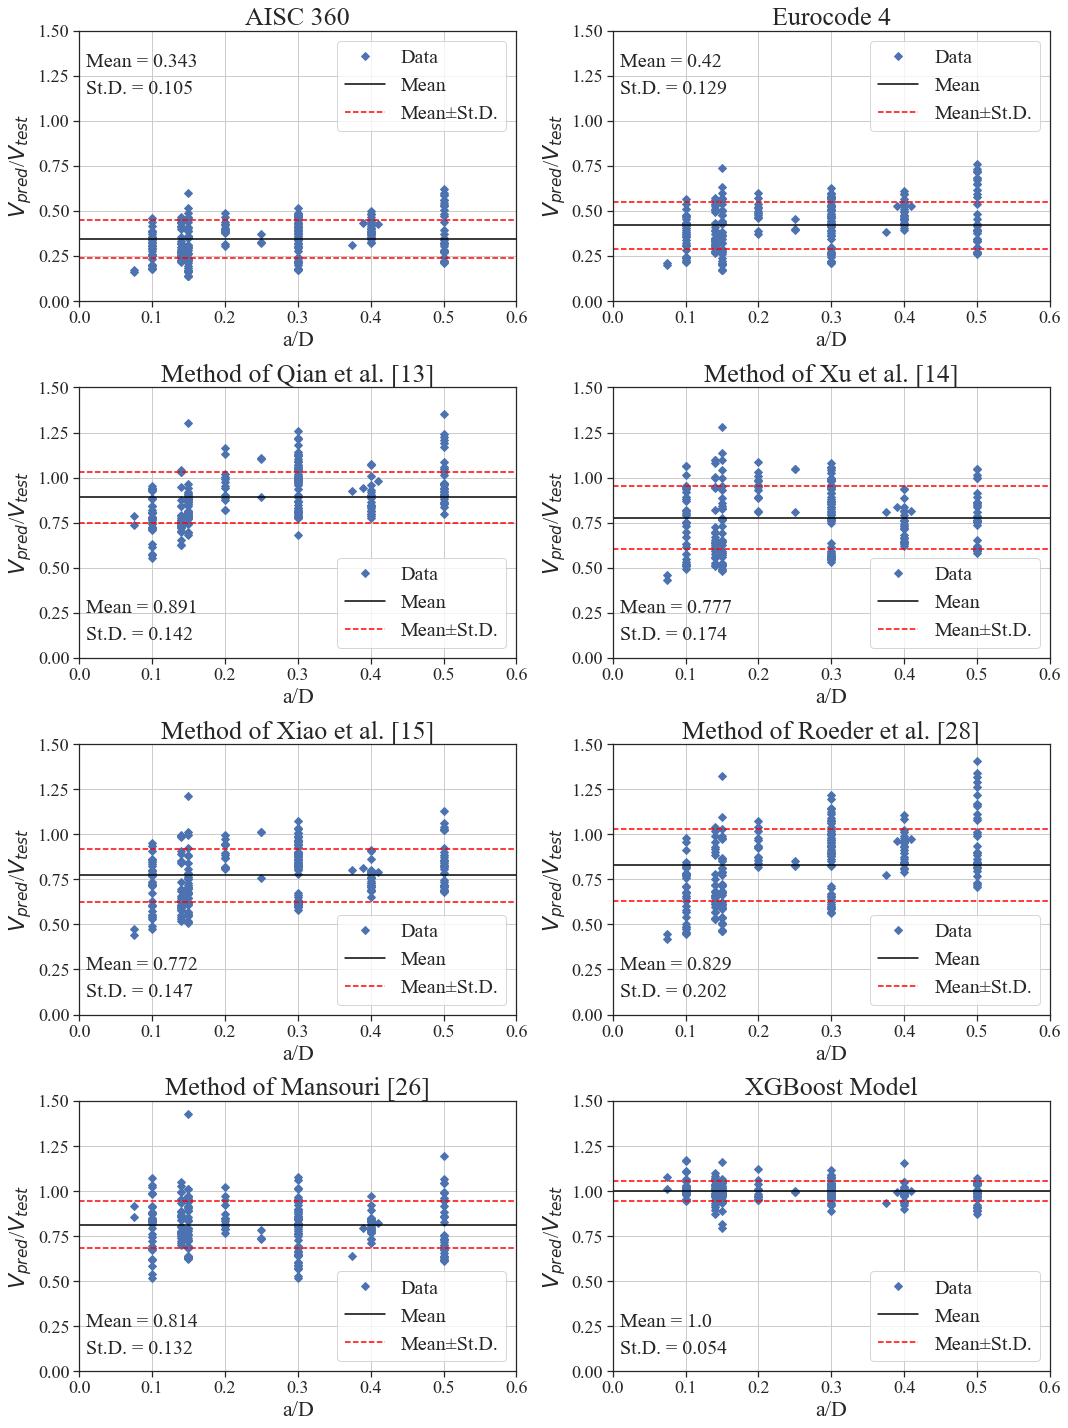

In [67]:
# plotting the scatter for the training and testing sets
fig_ratio, axs_ratio = plt.subplots(4, 2, figsize = (15, 20))

ix = 0; iy = 0
mean = np.mean(em_data['V_AISC/Vexp'])
std = np.std(em_data['V_AISC/Vexp'])
axs_ratio[ix, iy].set_title('AISC 360', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(em_data['a/D'], em_data['V_AISC/Vexp'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='upper right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 1.3, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 1.15, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

ix = 0; iy = 1
mean = np.mean(em_data['V_EC4/Vexp'])
std = np.std(em_data['V_EC4/Vexp'])
axs_ratio[ix, iy].set_title('Eurocode 4', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(em_data['a/D'], em_data['V_EC4/Vexp'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='upper right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 1.3, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 1.15, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

ix = 1; iy = 0
mean = np.mean(em_data['V_Qian/Vexp'])
std = np.std(em_data['V_Qian/Vexp'])
axs_ratio[ix, iy].set_title('Method of Qian et al. [13]', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(em_data['a/D'], em_data['V_Qian/Vexp'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='lower right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 0.25, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 0.1, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

ix = 1; iy = 1
mean = np.mean(em_data['V_Xu/Vexp'])
std = np.std(em_data['V_Xu/Vexp'])
axs_ratio[ix, iy].set_title('Method of Xu et al. [14]', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(em_data['a/D'], em_data['V_Xu/Vexp'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='lower right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 0.25, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 0.1, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

ix = 2; iy = 0
mean = np.mean(em_data['V_Xiao/Vexp'])
std = np.std(em_data['V_Xiao/Vexp'])
axs_ratio[ix, iy].set_title('Method of Xiao et al. [15]', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(em_data['a/D'], em_data['V_Xiao/Vexp'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='lower right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 0.25, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 0.1, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

ix = 2; iy = 1
mean = np.mean(em_data['V_Roeder/Vexp'])
std = np.std(em_data['V_Roeder/Vexp'])
axs_ratio[ix, iy].set_title('Method of Roeder et al. [28]', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(em_data['a/D'], em_data['V_Roeder/Vexp'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='lower right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 0.25, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 0.1, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

ix = 3; iy = 0
mean = np.mean(em_data['V_Mansouri/Vexp'])
std = np.std(em_data['V_Mansouri/Vexp'])
axs_ratio[ix, iy].set_title('Method of Mansouri [26]', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(em_data['a/D'], em_data['V_Mansouri/Vexp'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='lower right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 0.25, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 0.1, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

ix = 3; iy = 1
X_array = X.to_numpy()
X_array = scaler.fit_transform(X_array)
Y_xgboost = xgboost_model.predict(X_array)
mean = np.mean(Y_xgboost/data['Vtest (kN)'])
std = np.std(Y_xgboost/data['Vtest (kN)'])
axs_ratio[ix, iy].set_title('XGBoost Model', fontsize = 26, fontweight ="bold")
axs_ratio[ix, iy].set_xlim(0, 0.6)
axs_ratio[ix, iy].set_ylim(0, 1.5)
axs_ratio[ix, iy].set_xlabel('a/D', fontsize = 22)
axs_ratio[ix, iy].set_ylabel('$V_{pred}$/$V_{test}$', fontsize = 22)
axs_ratio[ix, iy].tick_params(axis='both', labelsize=18)
axs_ratio[ix, iy].plot(data['a/D'], Y_xgboost/data['Vtest (kN)'], 'D', color='b')
axs_ratio[ix, iy].plot([0, 0.6], [mean, mean], color='black')
axs_ratio[ix, iy].plot([0, 0.6], [mean+std, mean+std], c='red', ls='dashed')
axs_ratio[ix, iy].plot([0, 0.6], [mean-std, mean-std], c='red', ls='dashed')
axs_ratio[ix, iy].legend(['Data','Mean', 'Mean\u00B1St.D.'], loc='lower right', fontsize = 20)
axs_ratio[ix, iy].text(0.01 , 0.25, 'Mean = '+str(round(mean, 3)), fontsize=20)
axs_ratio[ix, iy].text(0.01 , 0.1, 'St.D. = '+str(round(std, 3)), fontsize=20)
axs_ratio[ix, iy].grid();

fig_ratio.tight_layout()
plt.savefig('empirical methods.eps', format='eps')

In [68]:
empirical_comparison  = pd.DataFrame(columns = ['Model', 'Min.', 'Max.', 'Mean', 'St.D.', 'COV (%)', 'R2', 'RMSE (kN)', 'MAE (kN)'])

empirical_comparison.loc[len(empirical_comparison)] = ('AISC 360',
                                            round(np.min(em_data['V_AISC/Vexp']),3),
                                            round(np.max(em_data['V_AISC/Vexp']),3),
                                            round(np.mean(em_data['V_AISC/Vexp']),3),           
                                            round(np.std(em_data['V_AISC/Vexp']),3),
                                            round(np.std(em_data['V_AISC/Vexp'])/np.mean(em_data['V_AISC/Vexp'])*100,2),                                                       
                                            round(r2_score(em_data['Vexp (KN)'], em_data['V_AISC (kN)']),3), 
                                            round(np.sqrt(mean_squared_error(em_data['Vexp (KN)'], em_data['V_AISC (kN)'])),2),
                                            round(mean_absolute_error(em_data['Vexp (KN)'], em_data['V_AISC (kN)']),2))

empirical_comparison.loc[len(empirical_comparison)] = ('Eurocode 4',
                                            round(np.min(em_data['V_EC4/Vexp']),3),
                                            round(np.max(em_data['V_EC4/Vexp']),3),
                                            round(np.mean(em_data['V_EC4/Vexp']),3),           
                                            round(np.std(em_data['V_EC4/Vexp']),3),
                                            round(np.std(em_data['V_EC4/Vexp'])/np.mean(em_data['V_EC4/Vexp'])*100,2),                                                       
                                            round(r2_score(em_data['Vexp (KN)'], em_data['V_EC4 (kN)']),3), 
                                            round(np.sqrt(mean_squared_error(em_data['Vexp (KN)'], em_data['V_EC4 (kN)'])),2),
                                            round(mean_absolute_error(em_data['Vexp (KN)'], em_data['V_EC4 (kN)']),2))

empirical_comparison.loc[len(empirical_comparison)] = ('Qian et al. (2007)',
                                            round(np.min(em_data['V_Qian/Vexp']),3),
                                            round(np.max(em_data['V_Qian/Vexp']),3),
                                            round(np.mean(em_data['V_Qian/Vexp']),3),           
                                            round(np.std(em_data['V_Qian/Vexp']),3),
                                            round(np.std(em_data['V_Qian/Vexp'])/np.mean(em_data['V_Qian/Vexp'])*100,2),                                                       
                                            round(r2_score(em_data['Vexp (KN)'], em_data['V_Qian (kN)']),3), 
                                            round(np.sqrt(mean_squared_error(em_data['Vexp (KN)'], em_data['V_Qian (kN)'])),2),
                                            round(mean_absolute_error(em_data['Vexp (KN)'], em_data['V_Qian (kN)']),2))

empirical_comparison.loc[len(empirical_comparison)] = ('Xu et al. (2009)',
                                            round(np.min(em_data['V_Xu/Vexp']),3),
                                            round(np.max(em_data['V_Xu/Vexp']),3),
                                            round(np.mean(em_data['V_Xu/Vexp']),3),           
                                            round(np.std(em_data['V_Xu/Vexp']),3),
                                            round(np.std(em_data['V_Xu/Vexp'])/np.mean(em_data['V_Xu/Vexp'])*100,2),
                                            round(r2_score(em_data['Vexp (KN)'], em_data['V_Xu (kN)']),3), 
                                            round(np.sqrt(mean_squared_error(em_data['Vexp (KN)'], em_data['V_Xu (kN)'])),2),
                                            round(mean_absolute_error(em_data['Vexp (KN)'], em_data['V_Xu (kN)']),2))

empirical_comparison.loc[len(empirical_comparison)] = ('Xiao et al. (2012)',
                                            round(np.min(em_data['V_Xiao/Vexp']),3),
                                            round(np.max(em_data['V_Xiao/Vexp']),3),
                                            round(np.mean(em_data['V_Xiao/Vexp']),3),           
                                            round(np.std(em_data['V_Xiao/Vexp']),3),
                                            round(np.std(em_data['V_Xiao/Vexp'])/np.mean(em_data['V_Xiao/Vexp'])*100,2),
                                            round(r2_score(em_data['Vexp (KN)'], em_data['V_Xiao(kN)']),3), 
                                            round(np.sqrt(mean_squared_error(em_data['Vexp (KN)'], em_data['V_Xiao(kN)'])),2),
                                            round(mean_absolute_error(em_data['Vexp (KN)'], em_data['V_Xiao(kN)']),2))

empirical_comparison.loc[len(empirical_comparison)] = ('Roeder et al. (2016)',
                                            round(np.min(em_data['V_Roeder/Vexp']),3),
                                            round(np.max(em_data['V_Roeder/Vexp']),3),
                                            round(np.mean(em_data['V_Roeder/Vexp']),3),           
                                            round(np.std(em_data['V_Roeder/Vexp']),3),
                                            round(np.std(em_data['V_Roeder/Vexp'])/np.mean(em_data['V_Roeder/Vexp'])*100,2),
                                            round(r2_score(em_data['Vexp (KN)'], em_data['V_Roeder (kN)']),3), 
                                            round(np.sqrt(mean_squared_error(em_data['Vexp (KN)'], em_data['V_Roeder (kN)'])),2),
                                            round(mean_absolute_error(em_data['Vexp (KN)'], em_data['V_Roeder (kN)']),2))

empirical_comparison.loc[len(empirical_comparison)] = ('Mansouri (2020)',
                                            round(np.min(em_data['V_Mansouri/Vexp']),3),
                                            round(np.max(em_data['V_Mansouri/Vexp']),3),
                                            round(np.mean(em_data['V_Mansouri/Vexp']),3),           
                                            round(np.std(em_data['V_Mansouri/Vexp']),3),
                                            round(np.std(em_data['V_Mansouri/Vexp'])/np.mean(em_data['V_Mansouri/Vexp'])*100,2),
                                            round(r2_score(em_data['Vexp (KN)'], em_data['V_Mansouri (kN)']),3), 
                                            round(np.sqrt(mean_squared_error(em_data['Vexp (KN)'], em_data['V_Mansouri (kN)'])),2),
                                            round(mean_absolute_error(em_data['Vexp (KN)'], em_data['V_Mansouri (kN)']),2))

empirical_comparison.loc[len(empirical_comparison)] = ('XGBoost',
                                            round(np.min(Y_xgboost/data['Vtest (kN)']),3),
                                            round(np.max(Y_xgboost/data['Vtest (kN)']),3),
                                            round(np.mean(Y_xgboost/data['Vtest (kN)']),3),           
                                            round(np.std(Y_xgboost/data['Vtest (kN)']),3),
                                            round(np.std(Y_xgboost/data['Vtest (kN)'])/np.mean(Y_xgboost/data['Vtest (kN)'])*100,2),
                                            round(r2_score(data['Vtest (kN)'], Y_xgboost),3), 
                                            round(np.sqrt(mean_squared_error(data['Vtest (kN)'], Y_xgboost)),2),
                                            round(mean_absolute_error(data['Vtest (kN)'], Y_xgboost),2))
empirical_comparison

,Model,Min.,Max.,Mean,St.D.,COV (%),R2,RMSE (kN),MAE (kN)
0,AISC 360,0.139,0.620,0.343,0.105,30.75,-0.623,765.76,602.51
1,Eurocode 4,0.170,0.759,0.420,0.129,30.75,-0.367,702.87,542.09
2,Qian et al. (2007),0.553,1.354,0.891,0.142,15.88,0.886,202.81,146.34
3,Xu et al. (2009),0.431,1.282,0.777,0.174,22.38,0.645,358.39,245.21
4,Xiao et al. (2012),0.442,1.214,0.772,0.147,19.05,0.679,340.75,238.22
5,Roeder et al. (2016),0.421,1.405,0.829,0.202,24.30,0.645,358.10,231.03
6,Mansouri (2020),0.518,1.426,0.814,0.132,16.22,0.734,309.78,207.84
7,XGBoost,0.794,1.171,1.000,0.054,5.42,0.993,49.31,31.79


It can be seen that the performance of the XGBoost model is better than available empirical equations.

# Interpretation of the XGBoost model using SHAP

C:\ProgramData\Anaconda3\envs\New\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


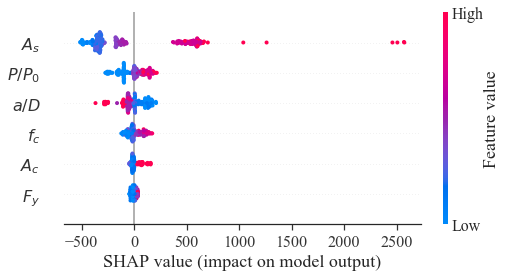

In [69]:
featureName=[r'$A_{s}$',r'$A_{c}$',r'$a/D$', r'$P/P_{0}$',r'$f_{c}$', r'$F_{y}$']
import shap
plt.style.use('seaborn-ticks')
plt.rcParams["font.family"] = "Times New Roman" 
shap.initjs()
X_shap = scaler.transform(X)
X_shap = pd.DataFrame(X_shap, columns = X.columns)
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap, feature_names= featureName, show=False)

fig, ax = plt.gcf(), plt.gca()
fig.axes[0].tick_params(labelsize=16)
fig.axes[0].xaxis.label.set_size(18)
fig.axes[-1].tick_params(labelsize=16)
fig.axes[-1].yaxis.label.set_size(18)

plt.savefig('summary plot.eps', format='eps')
plt.show()

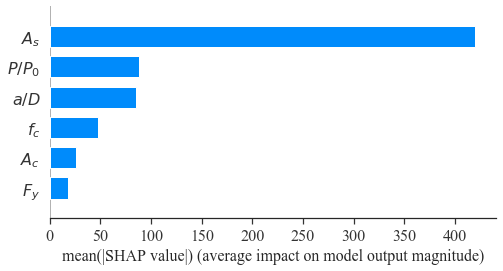

In [70]:
shap.summary_plot(shap_values, X_shap, feature_names=featureName, show=False,  plot_type="bar")

fig, ax = plt.gcf(), plt.gca()
ax.xaxis.label.set_size(16)
ax.tick_params(axis='both', labelsize=16)

plt.savefig('feature importance.eps', format='eps')
plt.show()

base value: 869.772
SHAP values: [ 419.8591    -45.335014   39.334965 -259.49112    85.46793   -29.13816 ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


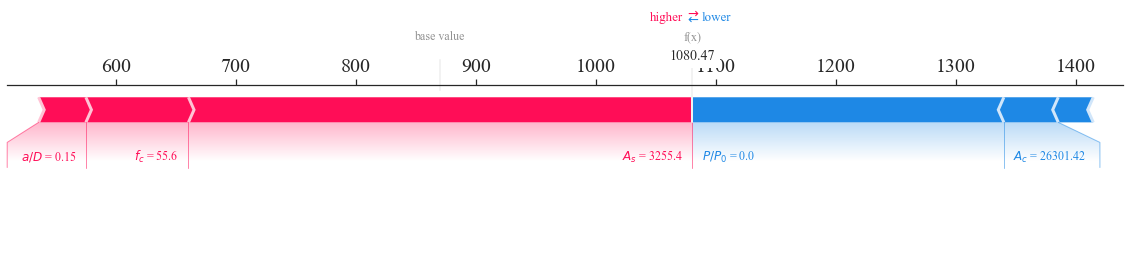

In [71]:
print('base value:', explainer.expected_value)
print('SHAP values:', shap_values[14,:])

shap.force_plot(explainer.expected_value, shap_values[14,:], X.iloc[14,:], feature_names=featureName, matplotlib = True,
                show=False)

fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=20)

plt.savefig('first specimen.eps', format='eps')
plt.show()

SHAP values: [-323.72485   -17.70948   144.55424    36.94759   -27.872875   30.9343  ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


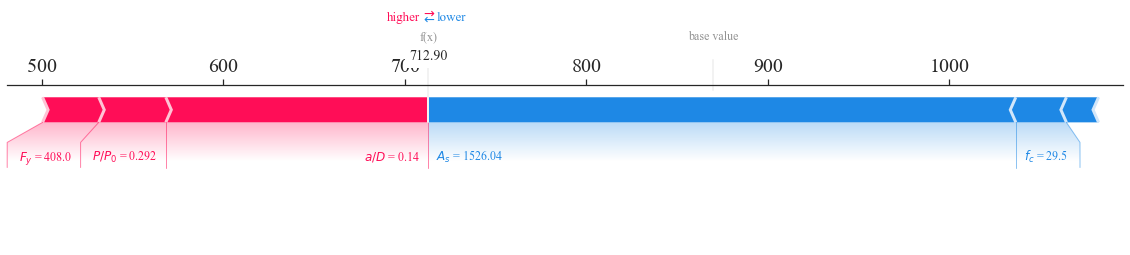

In [72]:
print('SHAP values:', shap_values[90,:])
shap.force_plot(explainer.expected_value, shap_values[90,:], X.iloc[90,:], feature_names=featureName, matplotlib = True,show=False)

fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=20)

plt.savefig('second specimen.eps', format='eps')
plt.show()

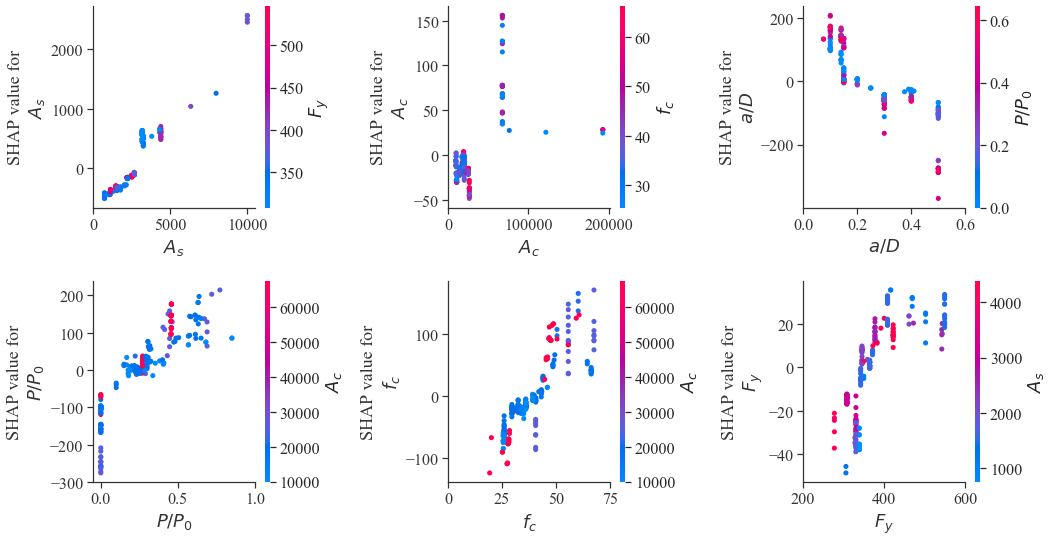

In [73]:
# Feature dependence plots

fig_dep, axs_dep = plt.subplots(2, 3,  figsize = (15, 8))

plt.rcParams['font.size'] = 22

shap.dependence_plot(0, shap_values, X, display_features=X_shap,feature_names=featureName,show=False,dot_size=26, xmin=0,
                     ax=axs_dep[0, 0]) 
shap.dependence_plot(1, shap_values, X, display_features=X_shap,feature_names=featureName,show=False,dot_size=26, 
                     ax=axs_dep[0, 1], interaction_index=4) 
shap.dependence_plot(2, shap_values, X, display_features=X_shap,feature_names=featureName,show=False,dot_size=26, xmin=0, 
                     xmax=0.6, ax=axs_dep[0, 2]) 
shap.dependence_plot(3, shap_values, X, display_features=X_shap,feature_names=featureName,show=False,dot_size=26, xmax=1,
                     ax=axs_dep[1, 0]) 
shap.dependence_plot(4, shap_values, X, display_features=X_shap,feature_names=featureName,show=False,dot_size=26, xmin=0,
                     xmax=75, ax=axs_dep[1, 1]) 
shap.dependence_plot(5, shap_values, X, display_features=X_shap,feature_names=featureName,show=False,dot_size=26, xmin=200,
                     xmax=600, ax=axs_dep[1, 2]) 

for idx in range(0, 2):
    for idy in range (0, 3):
        axs_dep[idx, idy].tick_params(axis='both', labelsize=16)
        axs_dep[idx, idy].xaxis.label.set_size(18)
        axs_dep[idx, idy].yaxis.label.set_size(18)

for i in range(-6, 0):
    fig_dep.axes[i].tick_params(labelsize=16)
    fig_dep.axes[i].yaxis.label.set_size(18)
          
fig_dep.tight_layout()
plt.savefig('dependence plots.eps', format='eps')